In [4]:
%matplotlib inline
from random import randint, seed
#hop commentaire
from enum import Enum
import matplotlib.pyplot as plt
class Strategie(Enum):
    CHANGER = 1
    GARDER = 2
seed()

def play_game(strategie):
    '''Simule une partie du jeu Monty Hall
    
    Cette fonction simule le choix de la porte par le participant
    
    Args:
        strategie (Strategie): la stratégie du joueur
        
    Returns:
        bool: le joueur a-t-il gagné ?
    '''
    portes = [0,1,2]
    bonne_porte = randint(0,2)
    premier_choix = randint(0,2)
    portes.remove(premier_choix)
    
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]
        
    deuxieme_choix = 0
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
    elif strategie == Strategie.GARDER:
        deuxieme_choix = premier_choix
    else:
        raise ValueError("Stratégie non reconnue !")
        
    return deuxieme_choix == bonne_porte
    
play_game(Strategie.CHANGER)

False

In [5]:
play_game(Strategie.CHANGER)

False

In [6]:
play_game(Strategie.CHANGER)

False

In [7]:
play_game(Strategie.CHANGER)

True

In [8]:
play_game(Strategie.CHANGER)

True

In [11]:
def play(strategie, nb_tours):
    '''
    Simule une suite de tours de jeu
    
    Renvoie une liste de résultats de jeu
    
    Args:
        strategie (Strategie): la stratégie du joueur
        nb_tours (int): nombre de tours
        
    Returns:
        list: listes des gains du joueur
    '''
    
    return[1 if play_game(strategie) else 0 for i in range(nb_tours)]

print("En changeant de porte, le joueur a gagné {} sur 10000 parties."
     .format(sum(play(Strategie.CHANGER, 10000))))

print("En gardant son choix initial, le joueur a gagné {} sur 10000 parties."
     .format(sum(play(Strategie.GARDER, 10000))))

En changeant de porte, le joueur a gagné 6632 sur 10000 parties.
En gardant son choix initial, le joueur a gagné 3357 sur 10000 parties.


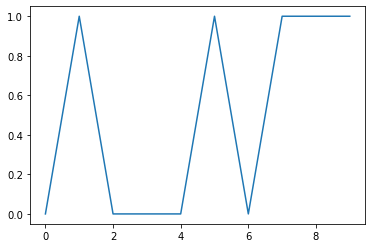

In [12]:
plot = plt.plot(play(Strategie.CHANGER, 10))

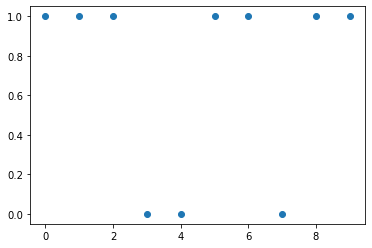

In [14]:
plot = plt.scatter(range(10), play(Strategie.CHANGER, 10))

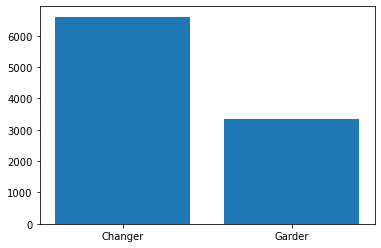

In [16]:
nb_test = 10000
plot = plt.bar([1,2], [sum(play(Strategie.CHANGER, nb_test)),
                      sum(play(Strategie.GARDER, nb_test))],
               tick_label=["Changer","Garder"])

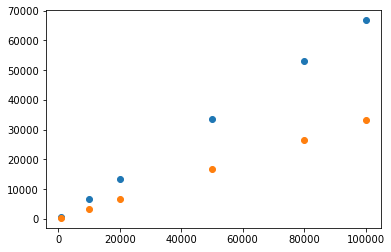

In [19]:
gains_changer = []
gains_garder = []
samples = [1000, 10000, 20000, 50000, 80000, 100000]
for tours in samples:
    gains_changer.append(play(Strategie.CHANGER, tours))
    gains_garder.append(play(Strategie.GARDER, tours))
figure = plt.figure()
plot = plt.scatter(samples, [sum(x) for x in gains_changer])
plot = plt.scatter(samples, [sum(x) for x in gains_garder])

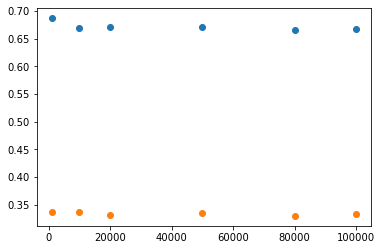

In [22]:
figure = plt.figure()
plot = plt.scatter(samples, [sum(x)/samples[gains_changer.index(x)] for x in gains_changer])
plot = plt.scatter(samples, [sum(x)/samples[gains_garder.index(x)] for x in gains_garder])